In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import public packages and functions
import os
import pandas as pd
import numpy as np
import sys
import json
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# inserting the lib folder to the compiler
sys.path.insert(0, './lib')
sys.path.insert(0, './utils/')

import utils_io, utils_spectogram, utils_plotting, utils_plotting_spectogram

from lib_LFP import LFP
from lib_event import EVENTS
from lib_data import DATA_IO

# 1. Data Load

In [3]:
PATH_CUR     = os.path.abspath(os.curdir)                   # current code
PATH         = (str(Path(PATH_CUR).parent))                 # data repository: upper directory where datasets situated
fs           = 2048
time_vector  = np.linspace(-2,2,fs*4)

In [4]:
# load LFP events
LFP_EVENTS   = utils_io.load_LFP_events(event_category="tapping", stn_areas=["motor", "associative", "limbic"], fs=fs)

# import baseline recordings
LFP_BASELINE = utils_io.load_baseline_recordings(recording_type="LFP")

Patient 019: does not have baseline recordings


# 2. Measure the CV for LFP Channels of Patients Under LID

In [7]:
SUB_LIST = ["008","009","012","013","014","020","021","102","105","107","108"]

########################################################################
Patient 008 - STN motor area: LFP channel cv measurement started...
---> left hemisphere - 04-01 channel is completed.
---> left hemisphere - 05-02 channel is completed.
---> left hemisphere - 06-03 channel is completed.
---> left hemisphere - 07-04 channel is completed.
---> left hemisphere - 08-05 channel is completed.
---> left hemisphere - 09-06 channel is completed.
---> left hemisphere - 10-07 channel is completed.
---> left hemisphere - 11-08 channel is completed.
---> left hemisphere - 11-09 channel is completed.
---> left hemisphere - 13-10 channel is completed.
---> left hemisphere - 14-11 channel is completed.
---> right hemisphere - 11-09 channel is completed.
---> right hemisphere - 04-01 channel is completed.
---> right hemisphere - 05-02 channel is completed.
---> right hemisphere - 06-03 channel is completed.
---> right hemisphere - 07-04 channel is completed.
---> right hemisphere - 08-05 channel 

<Figure size 640x480 with 0 Axes>

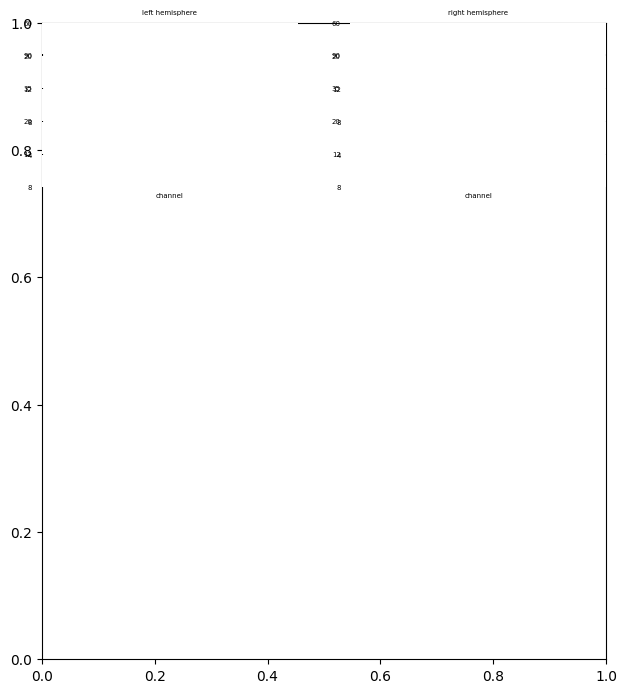

<Figure size 640x480 with 0 Axes>

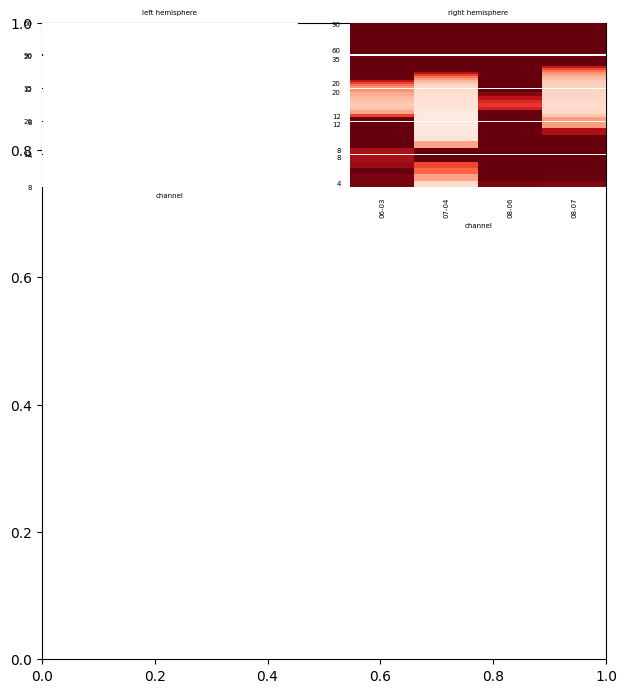

<Figure size 640x480 with 0 Axes>

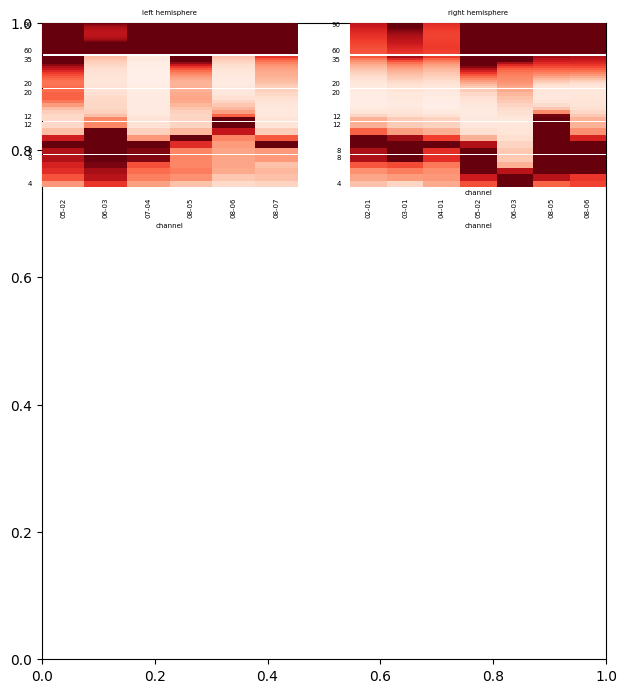

<Figure size 640x480 with 0 Axes>

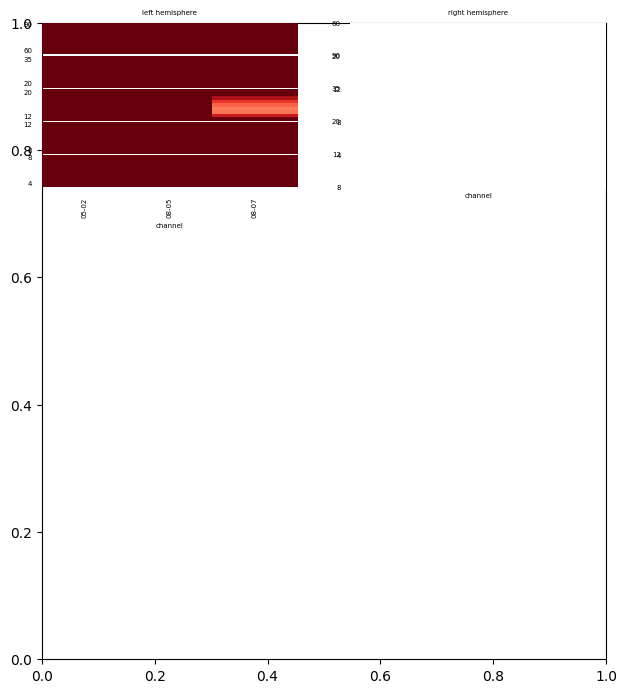

<Figure size 640x480 with 0 Axes>

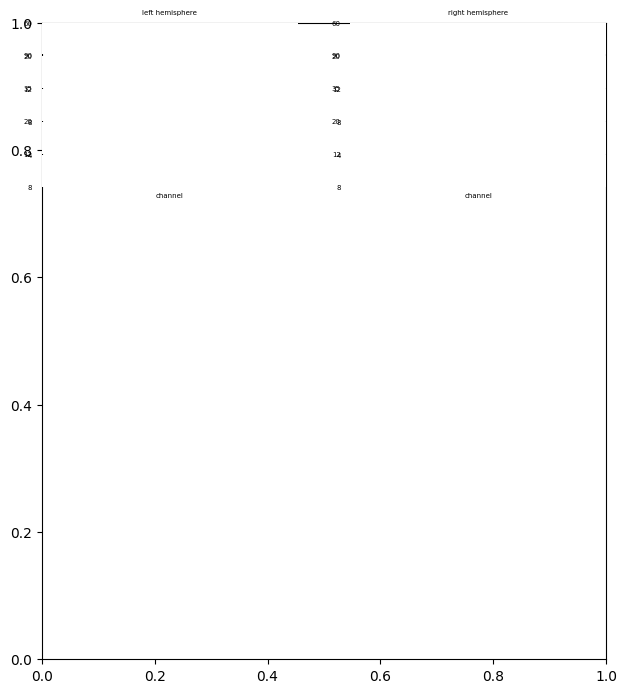

<Figure size 640x480 with 0 Axes>

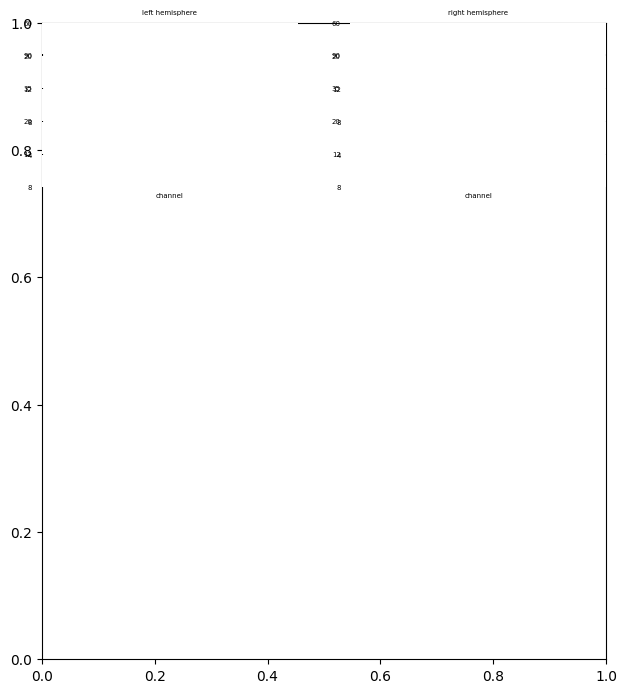

<Figure size 640x480 with 0 Axes>

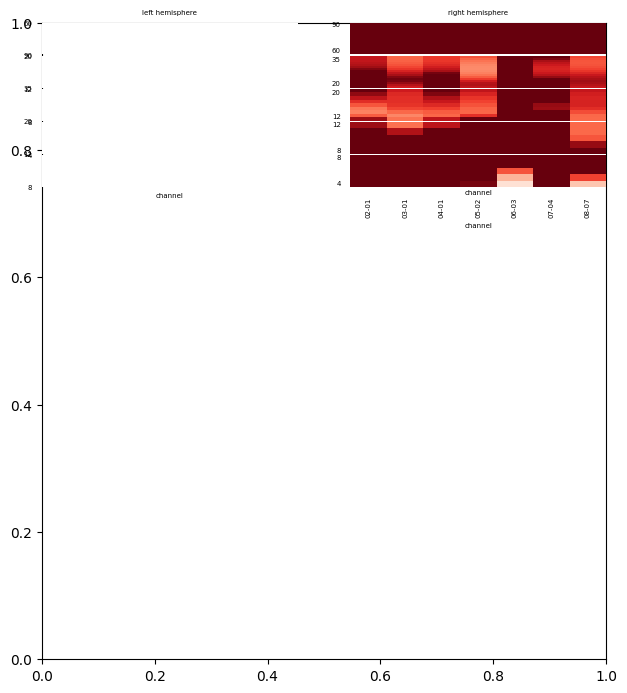

<Figure size 640x480 with 0 Axes>

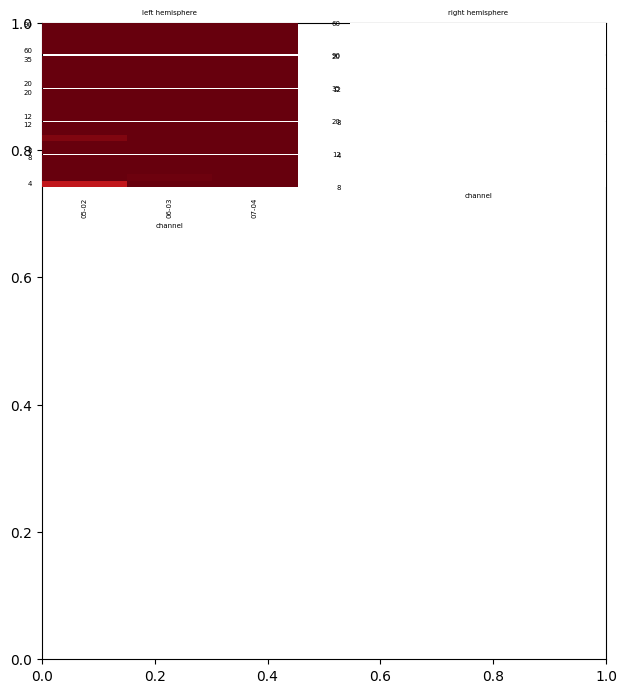

<Figure size 640x480 with 0 Axes>

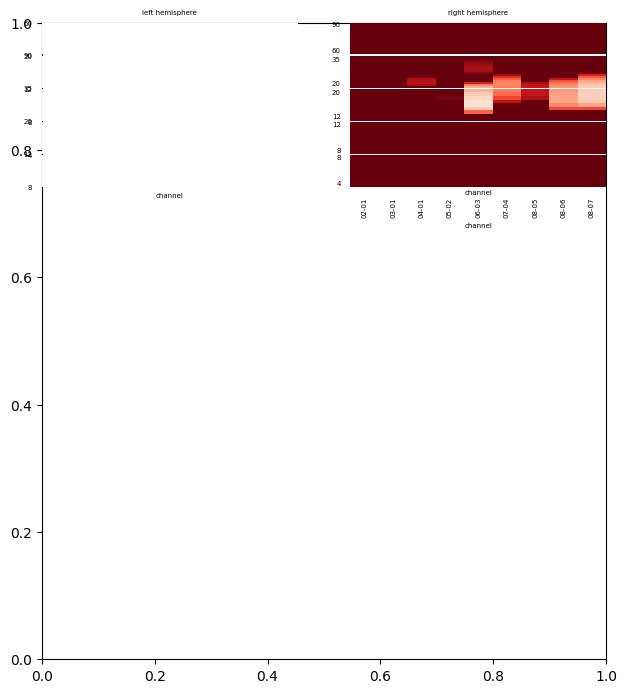

<Figure size 640x480 with 0 Axes>

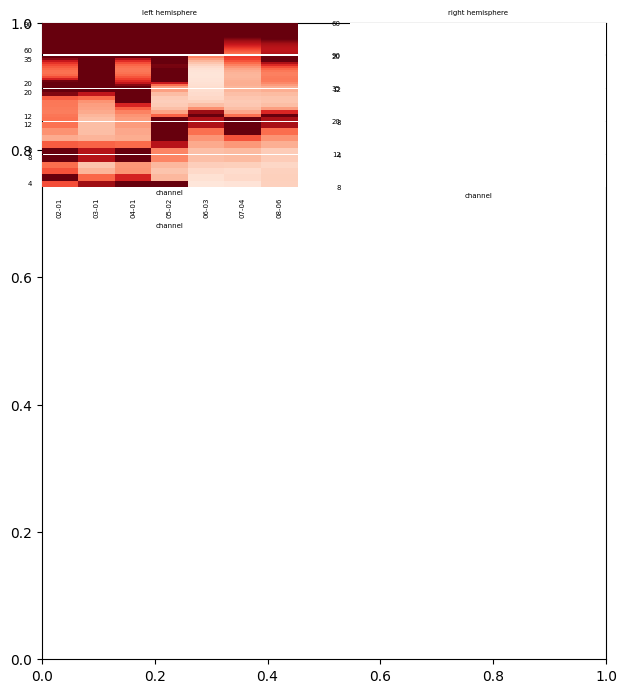

<Figure size 640x480 with 0 Axes>

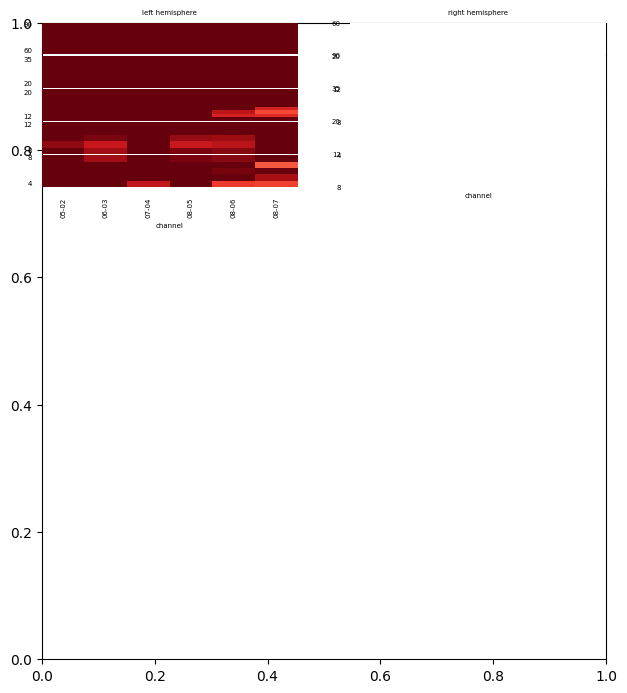

In [13]:
for patient in SUB_LIST:

    print("########################################################################")
    # get LFP events of patients in LFP channels belonging to different STN segments
    patient_motor_events       = LFP_EVENTS["motor"]["controlateral"]["LID"]
    patient_motor_events       = patient_motor_events[patient_motor_events.patient==patient]
    patient_associative_events = LFP_EVENTS["associative"]["controlateral"]["LID"]
    patient_associative_events = patient_associative_events[patient_associative_events.patient==patient]
    patient_limbic_events      = LFP_EVENTS["limbic"]["controlateral"]["LID"]
    patient_limbic_events      = patient_limbic_events[patient_limbic_events.patient==patient]
    
    # measure the coefficient of variation for each LFP channel
    df_motor_channel_cv       = utils_spectogram.get_LFP_channel_coefficient_of_variation(patient_motor_events,
                                                                                          dataset_baseline=LFP_BASELINE,
                                                                                          fs=fs, stn_area="motor")
    df_associative_channel_cv = utils_spectogram.get_LFP_channel_coefficient_of_variation(patient_associative_events, 
                                                                                          dataset_baseline=LFP_BASELINE, 
                                                                                          fs=fs, stn_area="associative")
    df_limbic_channel_cv      = utils_spectogram.get_LFP_channel_coefficient_of_variation(patient_limbic_events, 
                                                                                          dataset_baseline=LFP_BASELINE, 
                                                                                          fs=fs,stn_area="limbic")
    # combine all LFP channels
    df_patient_channel_cv     = pd.concat([df_motor_channel_cv, df_associative_channel_cv, df_limbic_channel_cv], ignore_index=True)
    
    # save df file 
    df_patient_channel_cv.to_pickle(DATA_IO.path_events + "channel_cv/LFP/" + patient + ".pkl")
    
    # save plot file file 
    utils_plotting_spectogram.plot_patient_channels_cv(df_patient_channel_cv, patient=patient, figure_name=DATA_IO.path_figure + patient + "/channel_cv")

# 3. Plot Normalized Event Spectrograms for LFP Channels

Created directory: ../figures//008/spectrogram/LID/
Patient 008 : left hemisphere - 04-01 channel is completed...
Patient 008 : left hemisphere - 05-02 channel is completed...
Patient 008 : left hemisphere - 06-03 channel is completed...
Patient 008 : left hemisphere - 07-04 channel is completed...
Patient 008 : left hemisphere - 08-05 channel is completed...
Patient 008 : left hemisphere - 09-06 channel is completed...
Patient 008 : left hemisphere - 10-07 channel is completed...
Patient 008 : left hemisphere - 11-08 channel is completed...
Patient 008 : left hemisphere - 11-09 channel is completed...
Patient 008 : left hemisphere - 13-10 channel is completed...
Patient 008 : left hemisphere - 14-11 channel is completed...
Patient 008 : right hemisphere - 11-09 channel is completed...
Patient 008 : right hemisphere - 04-01 channel is completed...
Patient 008 : right hemisphere - 05-02 channel is completed...
Patient 008 : right hemisphere - 06-03 channel is completed...
Patient 008 : 

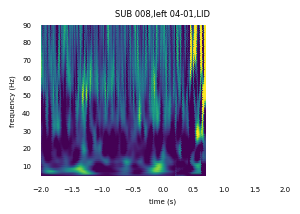

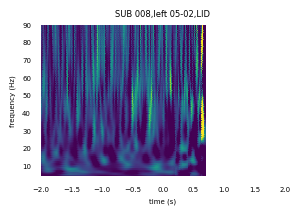

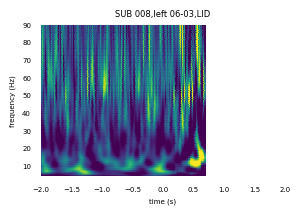

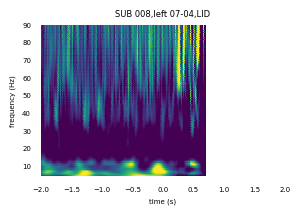

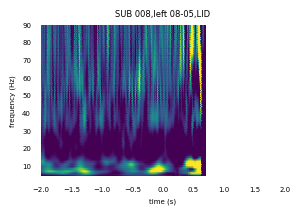

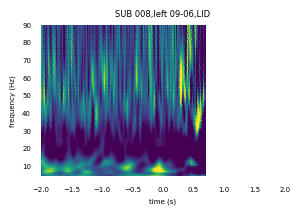

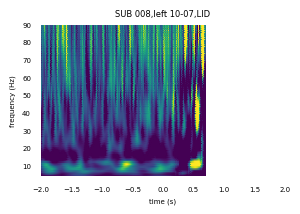

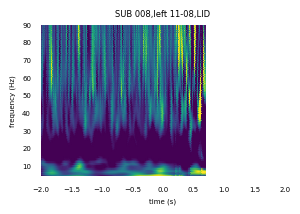

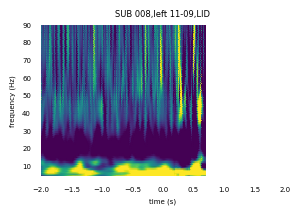

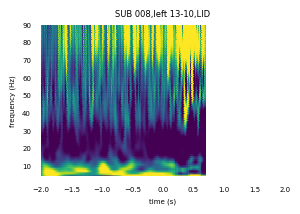

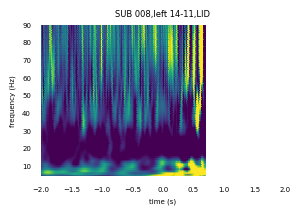

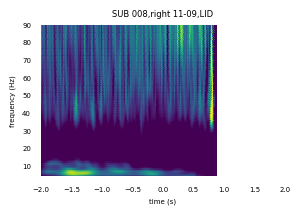

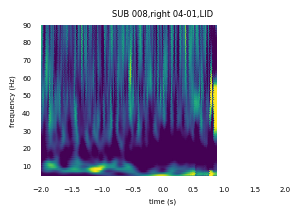

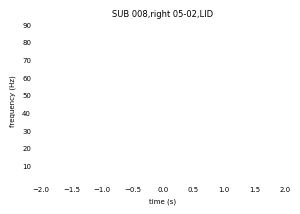

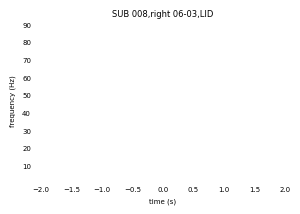

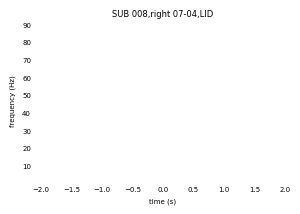

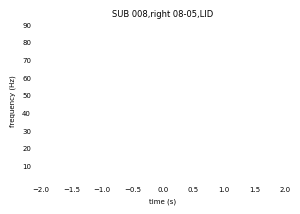

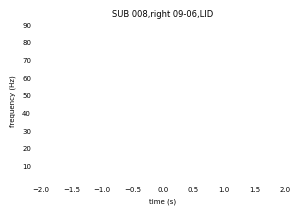

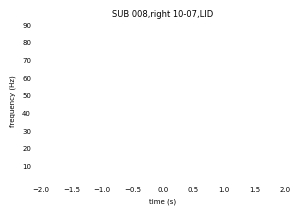

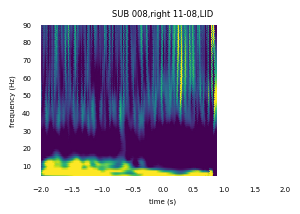

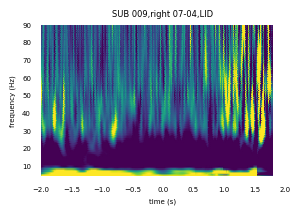

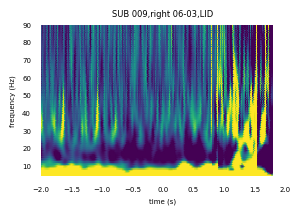

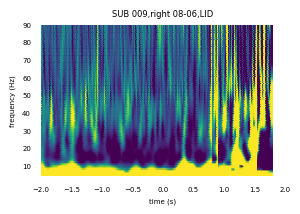

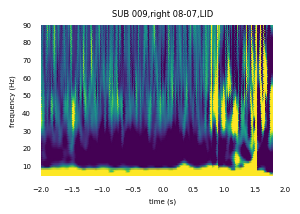

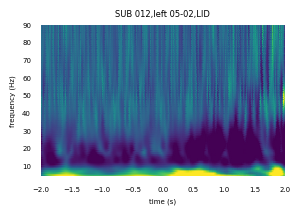

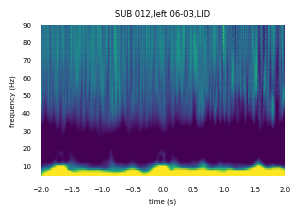

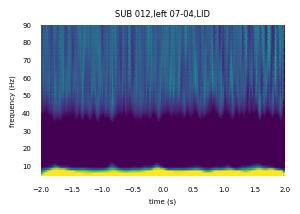

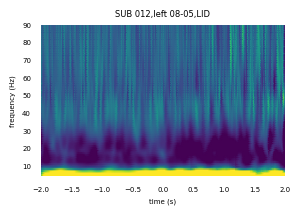

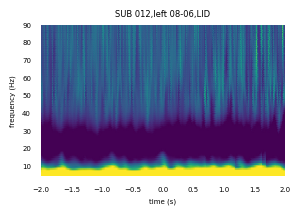

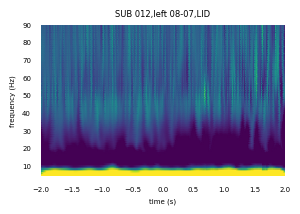

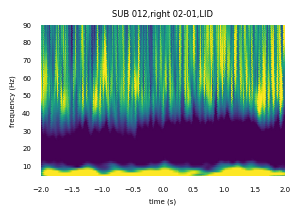

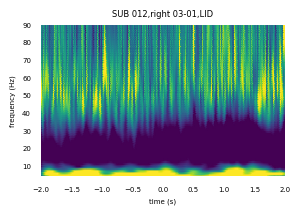

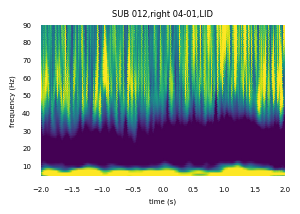

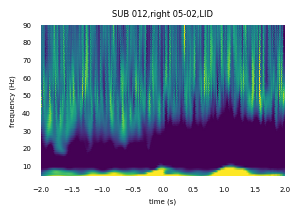

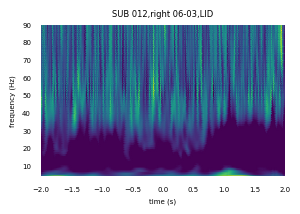

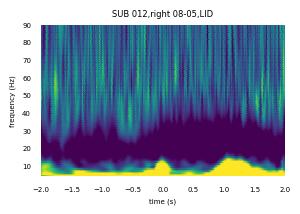

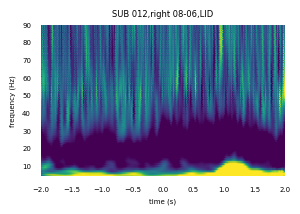

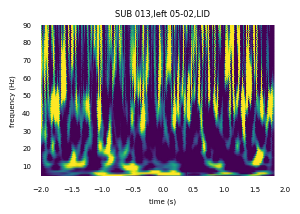

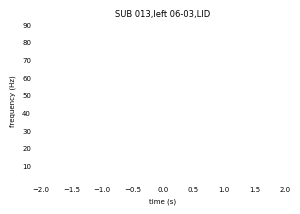

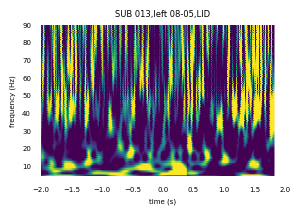

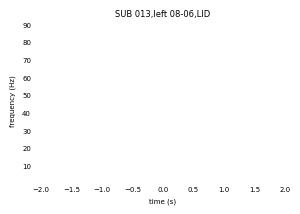

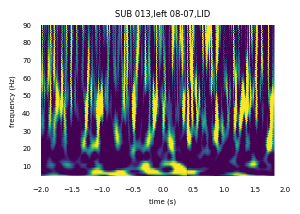

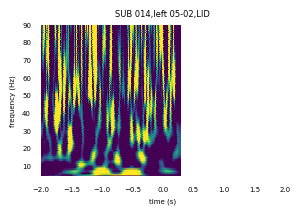

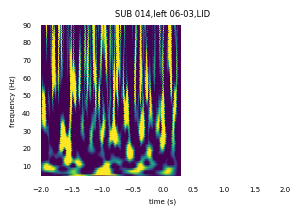

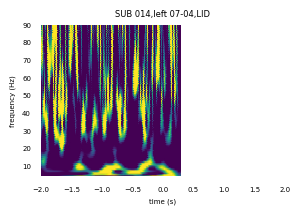

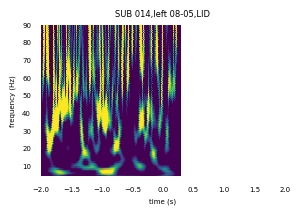

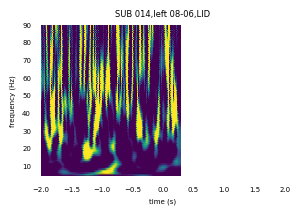

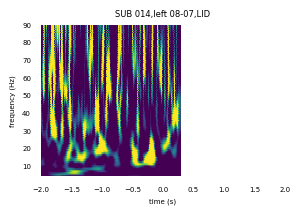

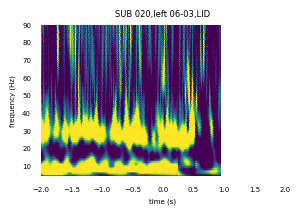

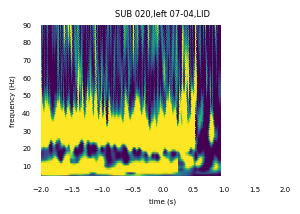

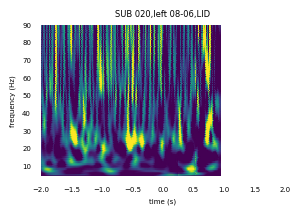

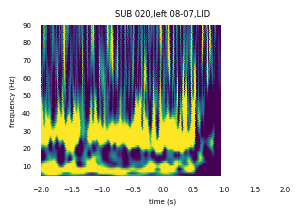

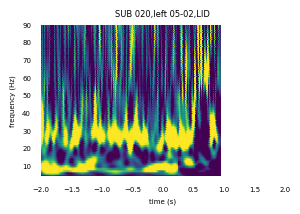

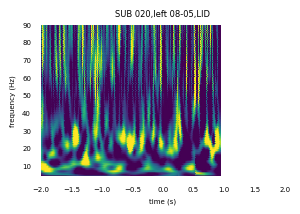

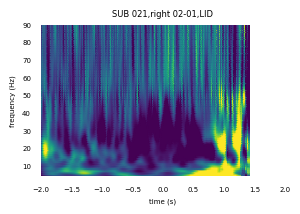

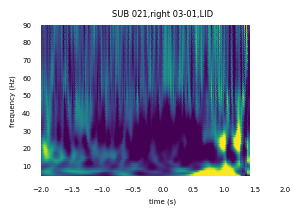

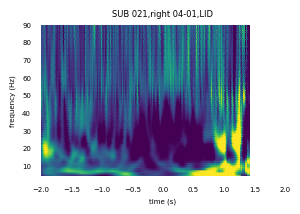

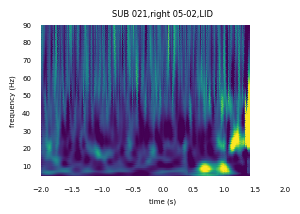

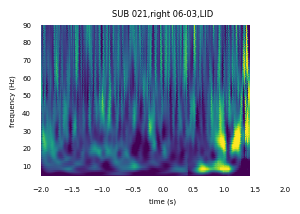

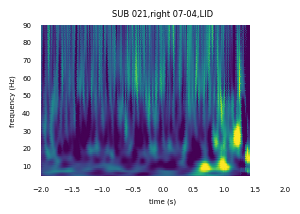

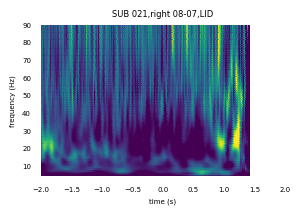

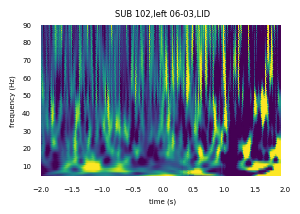

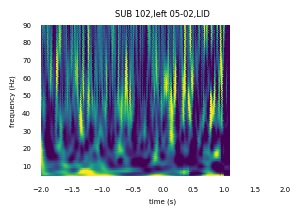

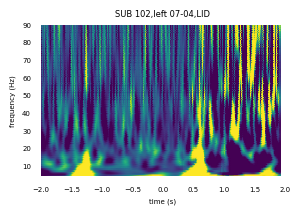

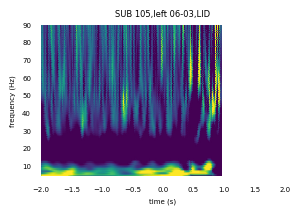

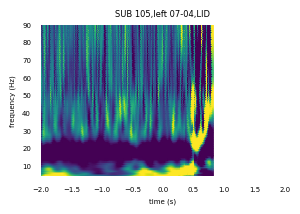

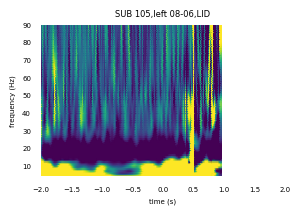

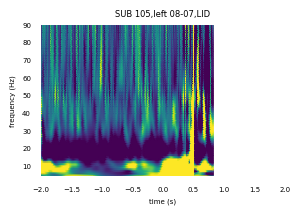

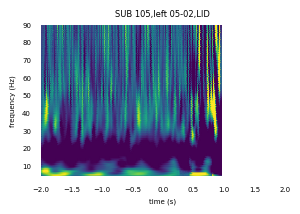

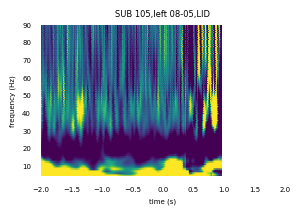

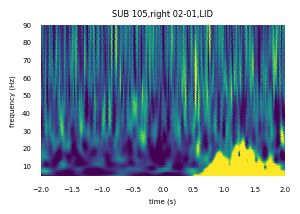

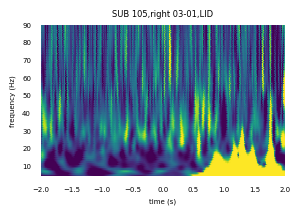

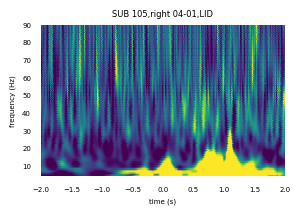

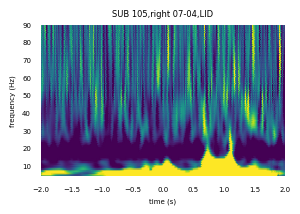

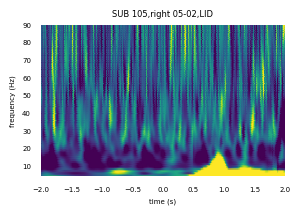

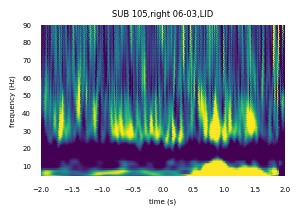

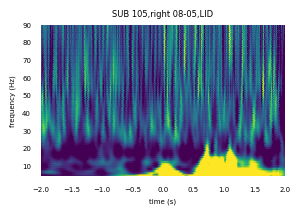

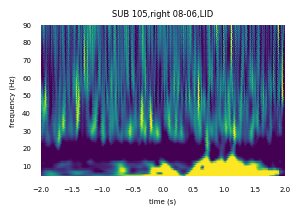

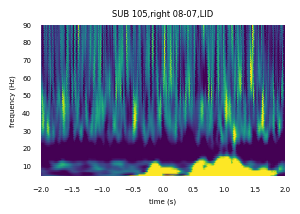

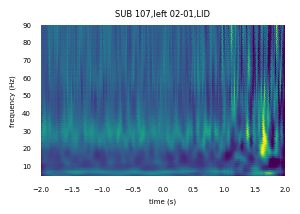

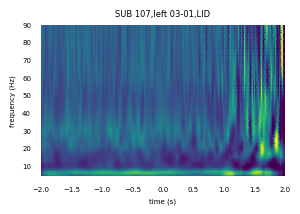

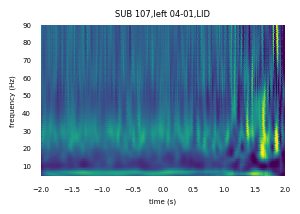

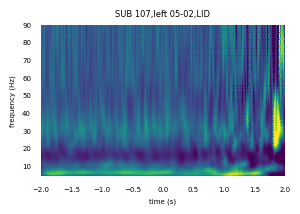

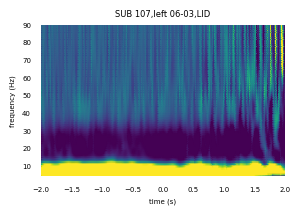

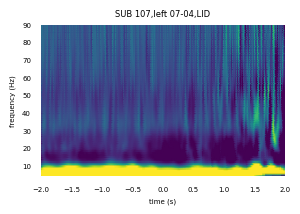

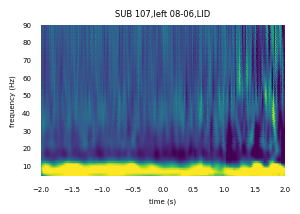

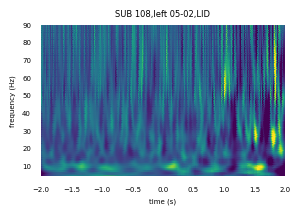

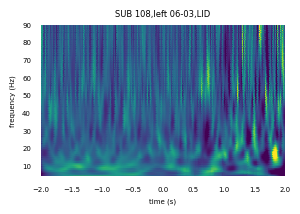

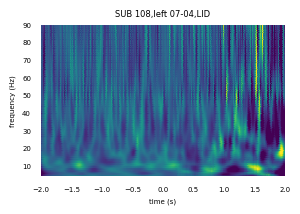

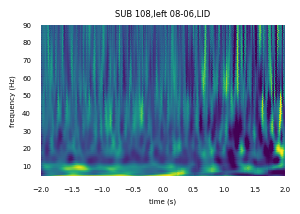

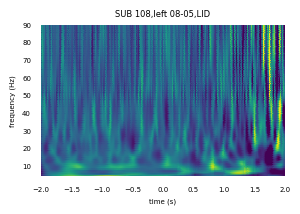

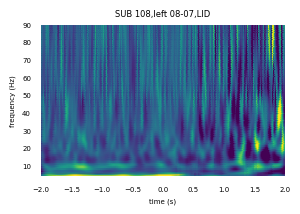

In [19]:
dyskinesia = "LID"

for patient in SUB_LIST:
    
    df_patient_channel_cv = pd.read_pickle(DATA_IO.path_events + "channel_cv/LFP/" + patient + ".pkl")
    
    for hemisphere in df_patient_channel_cv.hemisphere.unique():
        for channel in df_patient_channel_cv[df_patient_channel_cv.hemisphere==hemisphere].channel.unique():

            stn_area = df_patient_channel_cv[(df_patient_channel_cv.hemisphere==hemisphere) & (df_patient_channel_cv.channel==channel)].stn_area.unique()[0]

            ###################################################################################################################################################
            # plot for all LID events #########################################################################################################################
            ###################################################################################################################################################
            event_spectograms, b_mean, b_std = utils_spectogram.get_normalized_event_spectogram_by_channel(LFP_EVENTS[stn_area]["controlateral"][dyskinesia],
                                                                                                           LFP_BASELINE, 
                                                                                                           patient=patient,
                                                                                                           hemisphere=hemisphere,
                                                                                                           channel=channel,
                                                                                                           fs=fs)
            # get the average spectrogram and then normalize to baseline frequency mean
            event_spectogram_avg  = np.nanmean(event_spectograms, axis=0)
            event_spectogram_norm = (event_spectogram_avg - b_mean) / b_mean * 100

            utils_plotting_spectogram.plot_spectogram(event_spectogram_norm, np.linspace(-2,2,fs*4),
                                                      title              = "SUB " + patient + "," + hemisphere + " " + channel + "," + dyskinesia,
                                                      normalization_type = "percent", 
                                                      cbar               = False,
                                                      file_path          = DATA_IO.path_figure + "/" + patient + "/spectrogram/" + dyskinesia + "/",
                                                      figure_name        = hemisphere + "_" + channel)

            print("Patient " + patient + " : " + hemisphere + " hemisphere - " + channel + " channel is completed...")
            ###################################################################################################################################################
            # plot for different LID severity #################################################################################################################
            ###################################################################################################################################################
            #
            # LID      = LFP_EVENTS[stn_area]["controlateral"][dyskinesia]
            #
            # for severity in ["mild","moderate","severe"]:
            #    
            #     LID      = LID[LID.dyskinesia_arm==severity]
            #     
            #     event_spectograms, b_mean, b_std = utils_spectogram.get_normalized_event_spectogram_by_channel(LID,
            #                                                                                                   LFP_BASELINE, 
            #                                                                                                    patient=patient,
            #                                                                                                    hemisphere=hemisphere,
            #                                                                                                    channel=channel,
            #                                                                                                   fs=fs)
            #    # get the average spectrogram and then normalize to baseline frequency mean
            #    event_spectogram_avg  = np.nanmean(event_spectograms, axis=0)
            #    event_spectogram_norm = (event_spectogram_avg - b_mean) / b_mean * 100
            #    
            #    utils_plotting_spectogram.plot_spectogram(event_spectogram_norm, time_vector,
            #                                              title              = "SUB " + patient + "," + hemisphere + " " + channel + "," + dyskinesia,
            #                                              normalization_type = "percent", 
            #                                              cbar               = False,
            #                                              file_path          = DATA_IO.path_figure + "/" + patient + "/spectrogram/" + severity + "/",
            #                                              figure_name        = hemisphere + "_" + channel)